## Autoencoders with Convolutional Neural Network

In this project, I harnessed the power of autoencoders to address the challenge of image denoising. 
Autoencoders were employed as a robust solution for restoring the quality of noisy images. 
By meticulously training an autoencoder on a dataset of noisy images and compelling it to reconstruct pristine counterparts, 
the approach enabled the network to acquire the ability to discern and eliminate various forms of noise. 
Through this iterative process, the autoencoder progressively refined its understanding of the underlying structure of the images, 
effectively learning to filter out extraneous noise sources. 
As a result, the trained autoencoder exhibited remarkable proficiency in generating remarkably cleaner and clearer versions of the initial input images, 
showcasing the potential of autoencoders as a valuable tool for image denoising tasks.

In [1]:
#importing libraries
import numpy 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

In [2]:
# Training and Testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 18s 2us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

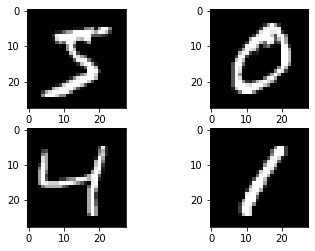

In [5]:
#Plot Images as a Grey Scale Image
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [6]:
#Formatting data for keras
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train.shape

(60000, 784)

In [8]:
X_test.shape

(10000, 784)

In [9]:
# Adding noise to the images
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

In [11]:
# Defining the encoder-decoder network
# create model
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

In [12]:
#Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
# Training model
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=2, batch_size=200)

Epoch 1/2
300/300 [==============================] - 12s 38ms/step - loss: 0.0424 - val_loss: 0.0203
Epoch 2/2
300/300 [==============================] - 15s 50ms/step - loss: 0.0170 - val_loss: 0.0139


In [14]:
# Final evaluation of the model
pred = model.predict(x_test_noisy)

In [17]:
pred.shape

(10000, 784)

In [18]:
X_test.shape

(10000, 784)

Test Images


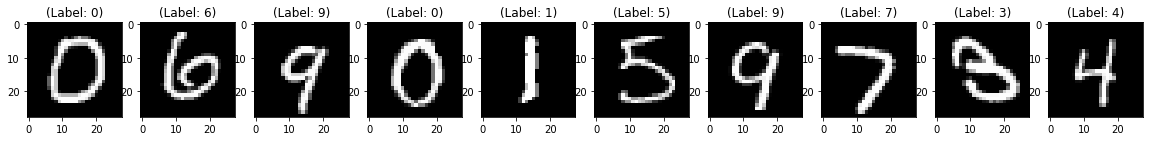

Test Images with Noise


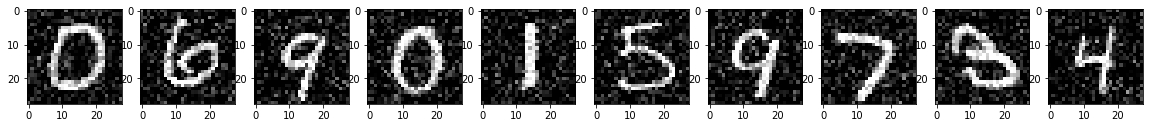

Reconstruction of Noisy Test Images


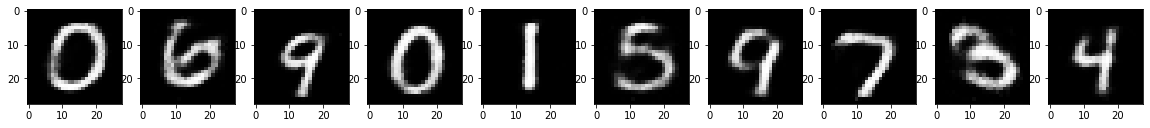

In [19]:
# evaluating the model
X_test = numpy.reshape(X_test, (10000,28,28)) *255
pred = numpy.reshape(pred, (10000,28,28)) *255
x_test_noisy = numpy.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i,:,:], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()

## The End